Advanced Analytics
Assignment 1
Group 11
Peter Day

In [ ]:
pip install xgboost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
# https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Column names
['client_id', 'homebanking_active', 'has_homebanking', 'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap', 'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance', 'has_personal_loan', 'has_mortgage_loan', 'has_current_account', 'has_pension_saving', 'has_savings_account', 'has_savings_account_starter', 'has_current_account_starter', 'bal_insurance_21', 'bal_insurance_23', 'cap_life_insurance_fixed_cap', 'cap_life_insurance_decreasing_cap', 'prem_fire_car_other_insurance', 'bal_personal_loan', 'bal_mortgage_loan', 'bal_current_account', 'bal_pension_saving', 'bal_savings_account', 'bal_savings_account_starter', 'bal_current_account_starter', 'visits_distinct_so', 'visits_distinct_so_areas', 'customer_since_all', 'customer_since_bank', 'customer_gender', 'customer_birth_date', 'customer_postal_code', 'customer_occupation_code', 'customer_self_employed', 'customer_education', 'customer_children', 'customer_relationship', 'target']


https://www.statology.org/pandas-rename-columns/


# Merging data

In [2]:
# csv data files are in a folder called data
file1 = "../data/train_month_1.csv"
file2 = "../data/train_month_2.csv"
file3 = "../data/train_month_3_with_target.csv"
files = [file3, file2, file1]
# https://stackoverflow.com/questions/68607106/creating-multiple-dataframes-using-for-loop-with-pandas
# my_dfs = {}
# for x in ['A', 'B', 'C']:
#     my_dfs[x] = pd.read_csv(r"C:\HSTS\OB\ODO\%s\test.csv" % x, delimiter=';')
# Then access the dataframes per key:
# my_dfs['A']

listnames = ['data3', 'data2', 'data1']
my_dfs = {}
for i in range(3):
    my_dfs[listnames[i]] = pd.read_csv(files[i])


In [3]:
# https://www.tutorialspoint.com/How-to-iterate-through-a-dictionary-in-Python
cols = ["customer_since_all", "customer_since_bank", "customer_birth_date"]
# for column in stu_df[['Name', 'Section']]:
# df[col] = pd.to_datetime(df[col])

# This converts the 3 time cols in the 3 dfs to datetime format then subtracts 'current date' to get time since
for k, v in my_dfs.items():
    print(k)
    for col in cols:
        v[col] = (pd.to_datetime('2018-03-01') - pd.to_datetime(v[col])).dt.days
        #v[col] = v[col].astype(int)
        
# if you run this more than once it gets confused, will have to start over by running the cell above too!

data3
data2
data1


In [4]:
data3 = my_dfs['data3']
data2 = my_dfs['data2']
data1 = my_dfs['data1']

In [5]:
# Rename columns with lag suffix
data3.columns = ['client_id', 'homebanking_active_l0', 'has_homebanking_l0', 'has_insurance_21_l0', 'has_insurance_23_l0', 'has_life_insurance_fixed_cap_l0', 'has_life_insurance_decreasing_cap_l0', 'has_fire_car_other_insurance_l0', 'has_personal_loan_l0', 'has_mortgage_loan_l0', 'has_current_account_l0', 'has_pension_saving_l0', 'has_savings_account_l0', 'has_savings_account_starter_l0', 'has_current_account_starter_l0', 'bal_insurance_21_l0', 'bal_insurance_23_l0', 'cap_life_insurance_fixed_cap_l0', 'cap_life_insurance_decreasing_cap_l0', 'prem_fire_car_other_insurance_l0', 'bal_personal_loan_l0', 'bal_mortgage_loan_l0', 'bal_current_account_l0', 'bal_pension_saving_l0', 'bal_savings_account_l0', 'bal_savings_account_starter_l0', 'bal_current_account_starter_l0', 'visits_distinct_so_l0', 'visits_distinct_so_areas_l0', 'customer_since_all_l0', 'customer_since_bank_l0', 'customer_gender_l0', 'customer_birth_date_l0', 'customer_postal_code_l0', 'customer_occupation_code_l0', 'customer_self_employed_l0', 'customer_education_l0', 'customer_children_l0', 'customer_relationship_l0', 'target']
data2.columns = ['client_id', 'homebanking_active_l1', 'has_homebanking_l1', 'has_insurance_21_l1', 'has_insurance_23_l1', 'has_life_insurance_fixed_cap_l1', 'has_life_insurance_decreasing_cap_l1', 'has_fire_car_other_insurance_l1', 'has_personal_loan_l1', 'has_mortgage_loan_l1', 'has_current_account_l1', 'has_pension_saving_l1', 'has_savings_account_l1', 'has_savings_account_starter_l1', 'has_current_account_starter_l1', 'bal_insurance_21_l1', 'bal_insurance_23_l1', 'cap_life_insurance_fixed_cap_l1', 'cap_life_insurance_decreasing_cap_l1', 'prem_fire_car_other_insurance_l1', 'bal_personal_loan_l1', 'bal_mortgage_loan_l1', 'bal_current_account_l1', 'bal_pension_saving_l1', 'bal_savings_account_l1', 'bal_savings_account_starter_l1', 'bal_current_account_starter_l1', 'visits_distinct_so_l1', 'visits_distinct_so_areas_l1', 'customer_since_all_l1', 'customer_since_bank_l1', 'customer_gender_l1', 'customer_birth_date_l1', 'customer_postal_code_l1', 'customer_occupation_code_l1', 'customer_self_employed_l1', 'customer_education_l1', 'customer_children_l1', 'customer_relationship_l1']
data1.columns = ['client_id', 'homebanking_active_l2', 'has_homebanking_l2', 'has_insurance_21_l2', 'has_insurance_23_l2', 'has_life_insurance_fixed_cap_l2', 'has_life_insurance_decreasing_cap_l2', 'has_fire_car_other_insurance_l2', 'has_personal_loan_l2', 'has_mortgage_loan_l2', 'has_current_account_l2', 'has_pension_saving_l2', 'has_savings_account_l2', 'has_savings_account_starter_l2', 'has_current_account_starter_l2', 'bal_insurance_21_l2', 'bal_insurance_23_l2', 'cap_life_insurance_fixed_cap_l2', 'cap_life_insurance_decreasing_cap_l2', 'prem_fire_car_other_insurance_l2', 'bal_personal_loan_l2', 'bal_mortgage_loan_l2', 'bal_current_account_l2', 'bal_pension_saving_l2', 'bal_savings_account_l2', 'bal_savings_account_starter_l2', 'bal_current_account_starter_l2', 'visits_distinct_so_l2', 'visits_distinct_so_areas_l2', 'customer_since_all_l2', 'customer_since_bank_l2', 'customer_gender_l2', 'customer_birth_date_l2', 'customer_postal_code_l2', 'customer_occupation_code_l2', 'customer_self_employed_l2', 'customer_education_l2', 'customer_children_l2', 'customer_relationship_l2']

In [ ]:
data3

In [6]:
# Join the 3 data frames into one.
data4 = data3.merge(data2, on='client_id', how='inner')
data_Nans = data4.merge(data1, on='client_id', how='inner')


In [7]:
data_Nans

,client_id,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,12784.0,8613.0,1,27210,3630,9.0,0,0.0,NaN,NaN
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,424.0,424.0,1,8794,2460,9.0,0,NaN,mature,couple
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,13604.0,13604.0,2,29736,2660,9.0,0,NaN,NaN,single
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,7152.0,1612.0,1,26114,6600,9.0,0,NaN,NaN,NaN
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,1946.0,1946.0,2,8004,8550,9.0,0,NaN,mature,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63692,0a58f2eb841ddac0626dacac6ca69524,1,1,1,0,0,0,0,0,0,...,7213.0,7213.0,2,13177,8000,9.0,0,NaN,no,couple
63693,193be2222be99bf04f42193b5cdfb95d,0,0,1,0,0,0,1,0,1,...,10531.0,10531.0,2,19297,2020,9.0,0,1.0,NaN,NaN
63694,fa9f074ec8cad610ccaec2270021490e,0,1,0,0,0,1,1,0,1,...,9921.0,9921.0,2,15095,1070,9.0,0,3.0,NaN,single
63695,5236064e97c655b0ad99ed2155e1139e,0,0,0,0,0,0,0,0,0,...,1430.0,1430.0,1,24472,2560,9.0,0,NaN,no,couple


In [8]:
# Impute missing values
#imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#imputer.fit(data)
#data = pd.DataFrame(data=imputer.transform(data_Nans), columns=data_Nans.columns)

In [9]:
# Impute without target for 115 columns to use with test data
data_Nans = data_Nans.drop(columns='target', axis=1)
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit(data_Nans)
data = pd.DataFrame(data=imputer.transform(data_Nans), columns=data_Nans.columns)

In [10]:
data.customer_children_l0.unique()

array(['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup',
       'onebaby', 'yes'], dtype=object)

In [11]:
data.customer_relationship_l0.unique()

array(['couple', 'single'], dtype=object)

In [12]:
data

,client_id,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
0,910df42ad36243aa4ce16324cd7b15b0,0,0,0,0,0,0,1,0,0,...,12784.0,8613.0,1,27210,3630,9.0,0,0.0,no,couple
1,4e19dc3a54323c5bbfc374664b950cd1,1,1,0,0,0,0,0,0,0,...,424.0,424.0,1,8794,2460,9.0,0,3.0,mature,couple
2,f5d08db1b86c0cb0f566bf446cff1fb4,1,1,0,0,0,0,1,0,0,...,13604.0,13604.0,2,29736,2660,9.0,0,3.0,no,single
3,26170ecf63653e215c52f4262c1c4859,0,0,0,0,0,0,1,0,0,...,7152.0,1612.0,1,26114,6600,9.0,0,3.0,no,couple
4,c078009957dffb64f20e61b41220a976,0,0,0,0,0,0,0,0,0,...,1946.0,1946.0,2,8004,8550,9.0,0,3.0,mature,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63692,0a58f2eb841ddac0626dacac6ca69524,1,1,1,0,0,0,0,0,0,...,7213.0,7213.0,2,13177,8000,9.0,0,3.0,no,couple
63693,193be2222be99bf04f42193b5cdfb95d,0,0,1,0,0,0,1,0,1,...,10531.0,10531.0,2,19297,2020,9.0,0,1.0,no,couple
63694,fa9f074ec8cad610ccaec2270021490e,0,1,0,0,0,1,1,0,1,...,9921.0,9921.0,2,15095,1070,9.0,0,3.0,no,single
63695,5236064e97c655b0ad99ed2155e1139e,0,0,0,0,0,0,0,0,0,...,1430.0,1430.0,1,24472,2560,9.0,0,3.0,no,couple


# Preprocessing

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#correlation matrix, check for corr >0.7 or corr < -0.7
#homebanking active + has homebanking = 0.83
corrMatrix = data3.corr()
print(corrMatrix)

                                      homebanking_active_l0  \
homebanking_active_l0                              1.000000   
has_homebanking_l0                                 0.836034   
has_insurance_21_l0                                0.147394   
has_insurance_23_l0                                0.031775   
has_life_insurance_fixed_cap_l0                    0.010467   
has_life_insurance_decreasing_cap_l0               0.370733   
has_fire_car_other_insurance_l0                    0.104131   
has_personal_loan_l0                               0.177037   
has_mortgage_loan_l0                               0.359048   
has_current_account_l0                             0.478934   
has_pension_saving_l0                              0.123796   
has_savings_account_l0                            -0.029550   
has_savings_account_starter_l0                     0.102035   
has_current_account_starter_l0                     0.149816   
bal_insurance_21_l0                                0.10

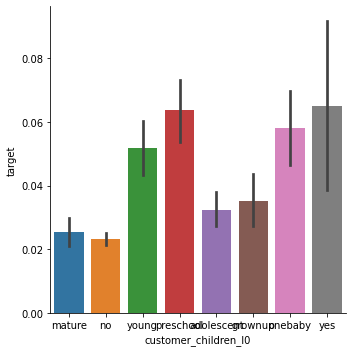

In [15]:
#maybe combine mature and no into one bin (or with adolescents + grown-ups) and another bin with yes and small children
sns.catplot(x= 'customer_children_l0', y = 'target',kind = 'bar', data = data3, legend_out = True)

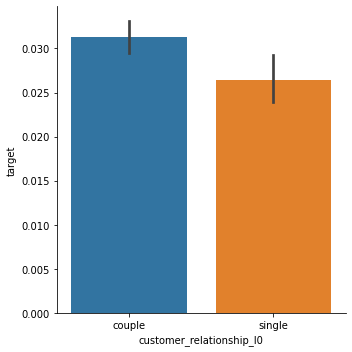

In [16]:
#no significant influence of single or not
sns.catplot(x= 'customer_relationship_l0', y = 'target',kind = 'bar', data = data3, legend_out = True)

In [18]:
#df.edjefe.replace(to_replace=['no', 'yes'], value=[0, 1])
data.replace(to_replace=['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup', 'onebaby', 'yes'],
             value=[0, 0, 1, 1, 1, 1, 1, 1], inplace=True)
data.replace(to_replace=['couple', 'single'], value=[1, 0], inplace=True)

In [19]:
data.shape

(63697, 115)

In [20]:
y = data3['target'].copy()


In [21]:
# https://www.statology.org/drop-column-pandas/
X = data.drop(columns='client_id', axis=1)
# scaler = StandardScaler()
# fit = scaler.fit(X)
# Z = fit.transform(X)

In [ ]:
X.to_csv("X.csv")
y.to_csv("y.csv")

In [22]:
def sensitivity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sens = cm[1][1]/sum(cm[1])
    return(sens)
def pospredvalue(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    if (cm[0][1]+cm[1][1]) == 0:
        return(0.0)
    else:
        ppv = cm[1][1]/(cm[0][1]+cm[1][1])
        return(ppv)
def totalfalserate(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tfr = (cm[0][1]+cm[1][0])/sum(sum(cm))
    return(tfr)

In [23]:
# Split data for training/validation, assuming balanced classes
# by default 75/25 split.  33 is a rndm seed - for reproducibility
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=33)

In [24]:
X_train.head(15)

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
41804,0,0,0,0,0,0,0,0,0,0,...,3315.0,3315.0,2,26206,2070,9.0,0,3.0,0,1
51011,1,1,0,0,0,0,0,0,1,1,...,2130.0,2130.0,1,12173,6640,4.0,1,2.0,0,1
48324,1,1,0,0,0,0,1,0,0,1,...,4838.0,4383.0,1,8429,3620,9.0,0,3.0,0,1
35601,0,0,0,0,0,0,0,0,0,0,...,4960.0,3957.0,1,26510,9620,9.0,0,3.0,0,1
44911,0,0,0,0,0,0,1,0,0,1,...,15034.0,15034.0,1,28733,2950,9.0,0,3.0,0,0
5909,0,0,0,0,0,0,0,0,0,0,...,13573.0,13573.0,2,26206,3920,9.0,0,3.0,0,1
63090,1,1,0,0,0,1,0,0,0,1,...,3957.0,759.0,1,14214,3700,9.0,0,3.0,0,1
53605,0,0,0,0,0,0,0,0,0,0,...,5903.0,5903.0,2,15796,9120,9.0,0,3.0,1,1
27024,0,0,0,0,0,0,1,0,0,1,...,9648.0,9648.0,2,21153,6600,9.0,0,3.0,0,0
12564,0,0,0,0,0,0,0,0,0,1,...,9070.0,9070.0,2,13057,4730,9.0,0,2.0,0,1


In [ ]:
#X_train.describe()
# this ignores columns that aren't purely numeric, including dates, but does include postal code

# Training

In [ ]:
# try a RF fit
rf = RandomForestClassifier(max_depth=4, random_state=0)
model1 = rf.fit(X_train, y_train)
#rf.score(X_valid, y_valid)

In [ ]:
#CV with accuracy as measure gives similar results
cv_scores = cross_val_score(model1, X_valid, y_valid, scoring = 'accuracy', cv=10)
cv_scores
print(np.mean(cv_scores))

In [ ]:
#CV with balanced accuracy, taking into account imbalanced character of data shows bad performance
#deeper tree, with max depth = 4 shows no improvement
cv_scores = cross_val_score(model1, X_valid, y_valid, scoring = 'balanced_accuracy', cv=10)
cv_scores
print(np.mean(cv_scores))

In [ ]:
#make predictions using CV
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(model1, X_valid, y_valid)
pred

In [ ]:
rf.score(X_valid, y_valid)

In [ ]:
y_predrf = rf.predict(X_valid)
print(confusion_matrix(y_valid, y_predrf))

In [ ]:
sensitivity(y_valid, y_predrf)

In [ ]:
pospredvalue(y_valid, y_predrf)

In [ ]:
# sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)
#y_scorerf = rf.predic_proba(X_valid)
#roc_auc_score(y_valid, y_scorerf)
# AttributeError: 'RandomForestClassifier' object has no attribute 'predic_proba'

In [ ]:
#F1 score might be good?
# https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook
# Try xgboost classifier
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric = ['auc', 'map'],
    random_state=33
)
model2 = xgb.fit(X_train, y_train, eval_set=[(X_valid, y_valid)])

In [ ]:
#gives R2
xgb.score(X_valid, y_valid)

In [ ]:
#CV with balanced accuracy, taking into account imbalanced character of data shows bad performance
cv_scores = cross_val_score(model2, X_valid, y_valid, scoring = 'balanced_accuracy', cv=10)
cv_scores
print(np.mean(cv_scores))

In [ ]:
y_predxgb = xgb.predict(X_valid)
print(confusion_matrix(y_valid, y_predxgb))

In [ ]:
#I don't really understand how cross val predict work, it gives worse results?
predxgb = cross_val_predict(model2, X_valid, y_valid)
print(confusion_matrix(y_valid, predxgb))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_predxgb).ravel()
(tn, fp, fn, tp)

In [ ]:
sensitivity(y_valid, y_predxgb)

In [ ]:
totalfalserate(y_valid, y_predxgb)

In [ ]:
# really slow: SVC(kernel="rbf", C=0.025, probability=True),
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    MLPClassifier((20,20), random_state=33, max_iter=500)
    ]

In [ ]:
for classifier in classifiers:
    classifier.fit(X_train, y_train)   
    y_pred = classifier.predict(X_valid)
    print(classifier)
    print("sensitivity: %.4f" % sensitivity(y_valid, y_pred))
    print("total false rate: %.4f" % totalfalserate(y_valid, y_pred))
    print("-------------------------")

In [ ]:
for i in range(1, 10, 2):
    kn = KNeighborsClassifier(i)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_valid)
    print(kn)
    print("sensitivity: %.4f" % sensitivity(y_valid, y_pred))
    print("total false rate: %.4f" % totalfalserate(y_valid, y_pred))
    print("-------------------------")

# Try with oversampling

In [25]:
#ONLY do oversampling on training set
df_train = X_train.copy()
df_train['target']= y_train
df_train.head() #include train set

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2,target
41804,0,0,0,0,0,0,0,0,0,0,...,3315.0,2,26206,2070,9.0,0,3.0,0,1,0
51011,1,1,0,0,0,0,0,0,1,1,...,2130.0,1,12173,6640,4.0,1,2.0,0,1,0
48324,1,1,0,0,0,0,1,0,0,1,...,4383.0,1,8429,3620,9.0,0,3.0,0,1,0
35601,0,0,0,0,0,0,0,0,0,0,...,3957.0,1,26510,9620,9.0,0,3.0,0,1,0
44911,0,0,0,0,0,0,1,0,0,1,...,15034.0,1,28733,2950,9.0,0,3.0,0,0,0


In [26]:
df_train['target'].value_counts()

0    46341
1     1431
Name: target, dtype: int64

In [27]:
#https://www.analyticsvidhya.com/blog/2021/06/5-techniques-to-handle-imbalanced-data-for-a-classification-problem/
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df_train[(df_train['target']==0)] 
df_minority = df_train[(df_train['target']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 46341, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

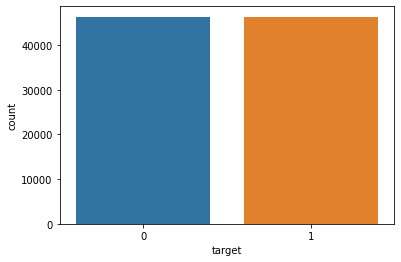

In [28]:
sns.countplot(df_upsampled['target'])

In [29]:
df_upsampled.head()

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2,target
54592,0,0,0,0,0,0,1,0,0,1,...,15553.0,1,32535,8480,9.0,0,3.0,0,1,1
49817,0,0,0,1,0,1,1,0,0,0,...,334.0,2,14396,2100,9.0,0,3.0,1,1,1
15556,0,0,0,0,0,0,0,0,0,1,...,7851.0,2,30497,3120,9.0,0,3.0,0,0,1
37521,1,1,0,0,0,0,1,0,0,1,...,13573.0,1,25141,9880,9.0,0,3.0,0,1,1
9119,0,0,0,0,0,0,0,0,0,0,...,2069.0,1,17532,9160,9.0,0,3.0,1,1,1


In [30]:
#make oversampled trainingset
X_train_upsampled = df_upsampled.drop(['target'], axis=1)
X_train_upsampled.head()

,homebanking_active_l0,has_homebanking_l0,has_insurance_21_l0,has_insurance_23_l0,has_life_insurance_fixed_cap_l0,has_life_insurance_decreasing_cap_l0,has_fire_car_other_insurance_l0,has_personal_loan_l0,has_mortgage_loan_l0,has_current_account_l0,...,customer_since_all_l2,customer_since_bank_l2,customer_gender_l2,customer_birth_date_l2,customer_postal_code_l2,customer_occupation_code_l2,customer_self_employed_l2,customer_education_l2,customer_children_l2,customer_relationship_l2
54592,0,0,0,0,0,0,1,0,0,1,...,15553.0,15553.0,1,32535,8480,9.0,0,3.0,0,1
49817,0,0,0,1,0,1,1,0,0,0,...,2282.0,334.0,2,14396,2100,9.0,0,3.0,1,1
15556,0,0,0,0,0,0,0,0,0,1,...,7851.0,7851.0,2,30497,3120,9.0,0,3.0,0,0
37521,1,1,0,0,0,0,1,0,0,1,...,13573.0,13573.0,1,25141,9880,9.0,0,3.0,0,1
9119,0,0,0,0,0,0,0,0,0,0,...,2069.0,2069.0,1,17532,9160,9.0,0,3.0,1,1


In [31]:
#make oversampled trainingset
y_train_upsampled = df_upsampled['target']
y_train_upsampled.head()

54592    1
49817    1
15556    1
37521    1
9119     1
Name: target, dtype: int64

# Training with oversampled dataframe

In [32]:
xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric = ['auc', 'map'],
    random_state=33
)
model3 = xgb.fit(X_train_upsampled, y_train_upsampled, eval_set=[(X_valid, y_valid)])

c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	validation_0-auc:0.68404	validation_0-map:0.06472
[1]	validation_0-auc:0.69488	validation_0-map:0.07017
[2]	validation_0-auc:0.68970	validation_0-map:0.07076
[3]	validation_0-auc:0.69453	validation_0-map:0.07252
[4]	validation_0-auc:0.69285	validation_0-map:0.07483
[5]	validation_0-auc:0.69633	validation_0-map:0.07154
[6]	validation_0-auc:0.69626	validation_0-map:0.06961
[7]	validation_0-auc:0.69204	validation_0-map:0.07409
[8]	validation_0-auc:0.69252	validation_0-map:0.07383
[9]	validation_0-auc:0.69252	validation_0-map:0.07123
[10]	validation_0-auc:0.69088	validation_0-map:0.07085
[11]	validation_0-auc:0.69144	validation_0-map:0.07121
[12]	validation_0-auc:0.68971	validation_0-map:0.06956
[13]	validation_0-auc:0.69015	validation_0-map:0.06941
[14]	validation_0-auc:0.68663	validation_0-map:0.06795
[15]	validation_0-auc:0.68546	validation_0-map:0.06889
[16]	validation_0-auc:0.68416	validation_0-map:0.06858
[17]	validation_0-auc:0.68483	validation_0-map:0.06851
[18]	validation_0-au

In [33]:
y_predxgb = xgb.predict(X_valid)
print(confusion_matrix(y_valid, y_predxgb))

[[13794  1649]
 [  357   125]]


In [34]:
tn, fp, fn, tp = confusion_matrix(y_valid, y_predxgb).ravel()
(tn, fp, fn, tp)

(13794, 1649, 357, 125)

In [35]:
#significant improvement!
sensitivity(y_valid, y_predxgb)

0.25933609958506226

In [36]:
#significant improvement!
totalfalserate(y_valid, y_predxgb)

0.12596546310832024

## Now predict on test data

In [37]:
file1_test = "../data/test_month_1.csv"
file2_test = "../data/test_month_2.csv"
file3_test = "../data/test_month_3.csv"
files_test = [file3_test, file2_test, file1_test]

listnames_test = ['data3_test', 'data2_test', 'data1_test']
my_dfs_test = {}
for i in range(3):
    my_dfs_test[listnames_test[i]] = pd.read_csv(files_test[i])


In [38]:
# This converts the 3 time cols in the 3 dfs to datetime format then subtracts 'current date' to get time since
cols_test = ["customer_since_all", "customer_since_bank", "customer_birth_date"]
for k, v in my_dfs_test.items():
    print(k)
    print(len(v))
    for col in cols_test:
        v[col] = (pd.to_datetime('2018-03-01') - pd.to_datetime(v[col])).dt.days

data3_test
27300
data2_test
27300
data1_test
27300


In [39]:
data3_test = my_dfs_test['data3_test']
data2_test = my_dfs_test['data2_test']
data1_test = my_dfs_test['data1_test']


In [40]:
# Rename columns with lag suffix
data3_test.columns = ['client_id', 'homebanking_active_l0', 'has_homebanking_l0', 'has_insurance_21_l0', 'has_insurance_23_l0', 'has_life_insurance_fixed_cap_l0', 'has_life_insurance_decreasing_cap_l0', 'has_fire_car_other_insurance_l0', 'has_personal_loan_l0', 'has_mortgage_loan_l0', 'has_current_account_l0', 'has_pension_saving_l0', 'has_savings_account_l0', 'has_savings_account_starter_l0', 'has_current_account_starter_l0', 'bal_insurance_21_l0', 'bal_insurance_23_l0', 'cap_life_insurance_fixed_cap_l0', 'cap_life_insurance_decreasing_cap_l0', 'prem_fire_car_other_insurance_l0', 'bal_personal_loan_l0', 'bal_mortgage_loan_l0', 'bal_current_account_l0', 'bal_pension_saving_l0', 'bal_savings_account_l0', 'bal_savings_account_starter_l0', 'bal_current_account_starter_l0', 'visits_distinct_so_l0', 'visits_distinct_so_areas_l0', 'customer_since_all_l0', 'customer_since_bank_l0', 'customer_gender_l0', 'customer_birth_date_l0', 'customer_postal_code_l0', 'customer_occupation_code_l0', 'customer_self_employed_l0', 'customer_education_l0', 'customer_children_l0', 'customer_relationship_l0']
data2_test.columns = ['client_id', 'homebanking_active_l1', 'has_homebanking_l1', 'has_insurance_21_l1', 'has_insurance_23_l1', 'has_life_insurance_fixed_cap_l1', 'has_life_insurance_decreasing_cap_l1', 'has_fire_car_other_insurance_l1', 'has_personal_loan_l1', 'has_mortgage_loan_l1', 'has_current_account_l1', 'has_pension_saving_l1', 'has_savings_account_l1', 'has_savings_account_starter_l1', 'has_current_account_starter_l1', 'bal_insurance_21_l1', 'bal_insurance_23_l1', 'cap_life_insurance_fixed_cap_l1', 'cap_life_insurance_decreasing_cap_l1', 'prem_fire_car_other_insurance_l1', 'bal_personal_loan_l1', 'bal_mortgage_loan_l1', 'bal_current_account_l1', 'bal_pension_saving_l1', 'bal_savings_account_l1', 'bal_savings_account_starter_l1', 'bal_current_account_starter_l1', 'visits_distinct_so_l1', 'visits_distinct_so_areas_l1', 'customer_since_all_l1', 'customer_since_bank_l1', 'customer_gender_l1', 'customer_birth_date_l1', 'customer_postal_code_l1', 'customer_occupation_code_l1', 'customer_self_employed_l1', 'customer_education_l1', 'customer_children_l1', 'customer_relationship_l1']
data1_test.columns = ['client_id', 'homebanking_active_l2', 'has_homebanking_l2', 'has_insurance_21_l2', 'has_insurance_23_l2', 'has_life_insurance_fixed_cap_l2', 'has_life_insurance_decreasing_cap_l2', 'has_fire_car_other_insurance_l2', 'has_personal_loan_l2', 'has_mortgage_loan_l2', 'has_current_account_l2', 'has_pension_saving_l2', 'has_savings_account_l2', 'has_savings_account_starter_l2', 'has_current_account_starter_l2', 'bal_insurance_21_l2', 'bal_insurance_23_l2', 'cap_life_insurance_fixed_cap_l2', 'cap_life_insurance_decreasing_cap_l2', 'prem_fire_car_other_insurance_l2', 'bal_personal_loan_l2', 'bal_mortgage_loan_l2', 'bal_current_account_l2', 'bal_pension_saving_l2', 'bal_savings_account_l2', 'bal_savings_account_starter_l2', 'bal_current_account_starter_l2', 'visits_distinct_so_l2', 'visits_distinct_so_areas_l2', 'customer_since_all_l2', 'customer_since_bank_l2', 'customer_gender_l2', 'customer_birth_date_l2', 'customer_postal_code_l2', 'customer_occupation_code_l2', 'customer_self_employed_l2', 'customer_education_l2', 'customer_children_l2', 'customer_relationship_l2']

# Join the 3 data frames into one.
data4_test = data3_test.merge(data2_test, on='client_id', how='inner')
data_Nans_test = data4_test.merge(data1_test, on='client_id', how='inner')

In [41]:
# Impute missing values
data_test = pd.DataFrame(data=imputer.transform(data_Nans_test), columns=data_Nans_test.columns)
data_test.replace(to_replace=['no', 'mature', 'young', 'preschool', 'adolescent', 'grownup', 'onebaby', 'yes'],
             value=[0, 1, 1, 1, 1, 1, 1, 1], inplace=True)
data_test.replace(to_replace=['couple', 'single'], value=[1, 0], inplace=True)
clientID = pd.DataFrame(data=data_test['client_id'])
X_test = data_test.drop(columns='client_id', axis=1)

## Predict on test data and save as csv

In [42]:
y_pred_test = pd.DataFrame(xgb.predict_proba(X_test))
# Decision Tree did worse on the test data
#y_pred_test = pd.DataFrame(dt.predict_proba(X_test))

c:\users\peter\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [43]:
print(y_pred_test)

              0         1
0      0.899136  0.100864
1      0.589617  0.410383
2      0.218410  0.781590
3      0.903852  0.096148
4      0.627976  0.372024
...         ...       ...
27295  0.750827  0.249173
27296  0.912668  0.087332
27297  0.628634  0.371366
27298  0.715912  0.284088
27299  0.680273  0.319727

[27300 rows x 2 columns]


In [44]:
clientID['pred']=y_pred_test[1]

In [45]:
clientID.to_csv("y_pred_test_over.csv")